## Importing the libraries

In [286]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


## Loading the dataset

In [217]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [218]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [219]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [220]:
X = dataset[['Age', 'EstimatedSalary']]
Y = dataset[['Purchased']]

In [221]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [222]:
Y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


## Print count of each label in Purchased column

In [223]:
c= dataset.groupby(['Purchased'])[ 'Purchased'].count().reset_index(name='show_count')
c

,Purchased,show_count
0,0,257
1,1,143


In [224]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [225]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


## Print Correlation of each feature in the dataset

In [226]:
print(dataset[["Purchased","EstimatedSalary","Age","User ID"]].corr())

                 Purchased  EstimatedSalary       Age   User ID
Purchased         1.000000         0.362083  0.622454  0.007120
EstimatedSalary   0.362083         1.000000  0.155238  0.071097
Age               0.622454         0.155238  1.000000 -0.000721
User ID           0.007120         0.071097 -0.000721  1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Train the model with random_state = 0

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

## Print the prediction results

In [264]:
logreg= LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression()

In [265]:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values

     Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
146   27            96000
135   23            63000
390   48            33000
264   48            90000
364   42           104000

[100 rows x 2 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Create dataframe with the Actual Purchased and Predict Purchased

In [266]:
test_dataset = X_test
test_dataset 

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [267]:
y_pred=logreg.predict(X_test)
test_dataset['Predict_Purchased'] = y_pred
test_dataset


,Age,EstimatedSalary,Predict_Purchased
132,30,87000,0
309,38,50000,0
341,35,75000,0
196,30,79000,0
246,35,50000,0
...,...,...,...
146,27,96000,0
135,23,63000,0
390,48,33000,0
264,48,90000,0


In [268]:
test_dataset["Actual_Purchased"] = Y_test
test_dataset

,Age,EstimatedSalary,Predict_Purchased,Actual_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,0,1
135,23,63000,0,0
390,48,33000,0,1
264,48,90000,0,1


In [269]:
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

In [270]:
test_dataset

,Age,EstimatedSalary,Predict_Purchased,Actual_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,0,1
135,23,63000,0,0
390,48,33000,0,1
264,48,90000,0,1


## Print Confusion Matrix and classification_report

In [271]:
from sklearn.metrics import plot_confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[68,  0],
       [32,  0]], dtype=int64)

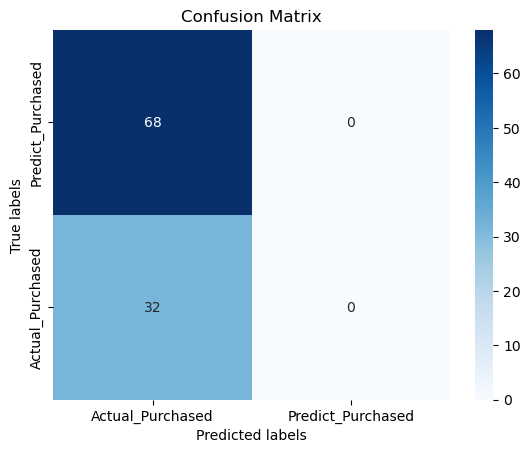

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt     
cm = confusion_matrix(Y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
#plot_confusison_matrix(classifier, X=X_test, y_true=y_test, camp='Blue');
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Actual_Purchased', 'Predict_Purchased']); ax.yaxis.set_ticklabels(['Predict_Purchased', 'Actual_Purchased']);

## Use StandardScaler() to improved performance and re-train your model

In [209]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
Xtest = sc.transform(X_test)

clas = LogisiRe(random=0)
clas.fit(X_train, Y_train)
y_pred = clas.predicate(X_test)

ValueError: X has 4 features, but StandardScaler is expecting 2 features as input.

In [212]:
from sklearn.preprocessing import StandardScaler

clas= LogisticRegression()
clas.fit(X_train, Y_train)
y_pred = clas.predict(X_test)

sc.fit(X_train)
x = sc.transform(X_train)
x

ValueError: X has 4 features, but LogisticRegression is expecting 2 features as input.

In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x = sc.transform(x)
x

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [275]:
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=10)

In [276]:
y_pred = classifier.predict(x)
test_acc = accuracy_score(Y_train, y_pred)
print(test_acc*100)

82.33333333333334


In [280]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [100, 300]

## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [281]:
print(classifier.predict(sc.transform([[30,90000]])))

[1]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [283]:
print(classifier.predict(sc.transform([[40,90000]])))

[1]


# Second: k-nearest neighbors model

In [294]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)
pred = knn.predict(x)

print('WITH K=3')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=3




ValueError: Found input variables with inconsistent numbers of samples: [100, 300]

In [304]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x, Y_test);

ValueError: Found input variables with inconsistent numbers of samples: [100, 300]